In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from env import user, host, password
from pydataset import data

In [2]:
def get_db_url(user, host, password, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [3]:
url = get_db_url(user, host, password, 'iris_db')
pd.read_sql('SHOW TABLES', url)

,Tables_in_iris_db
0,measurements
1,species


In [4]:
species = pd.read_sql('SELECT * FROM species', url)
measurements = pd.read_sql('SELECT * FROM measurements', url)

In [5]:
plants = pd.merge(species, measurements, left_on='species_id', 
         right_on='species_id')

In [6]:
plants.species_id.unique()

array([1, 2, 3])

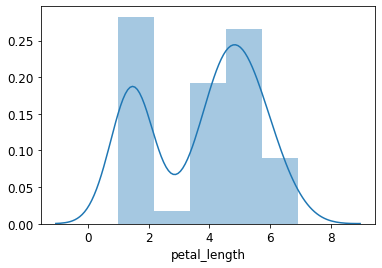

In [7]:
plt.rc('font',size=12)
sns.distplot(plants.petal_length)

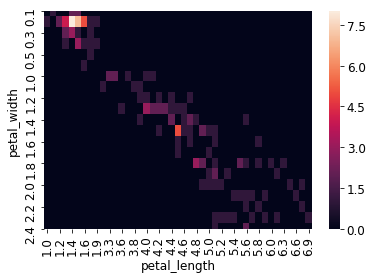

In [8]:
sns.heatmap(pd.crosstab(plants.petal_width, 
                        plants.petal_length))


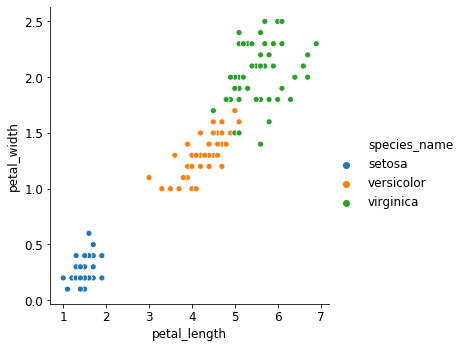

In [9]:
sns.relplot(x='petal_length',
            y='petal_width', hue='species_name',data=plants)

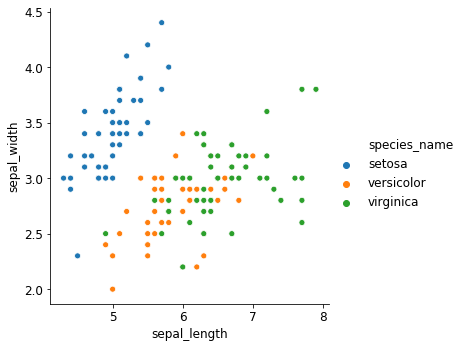

In [10]:
sns.relplot(x='sepal_length',
            y='sepal_width', data=plants, 
            hue='species_name')

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


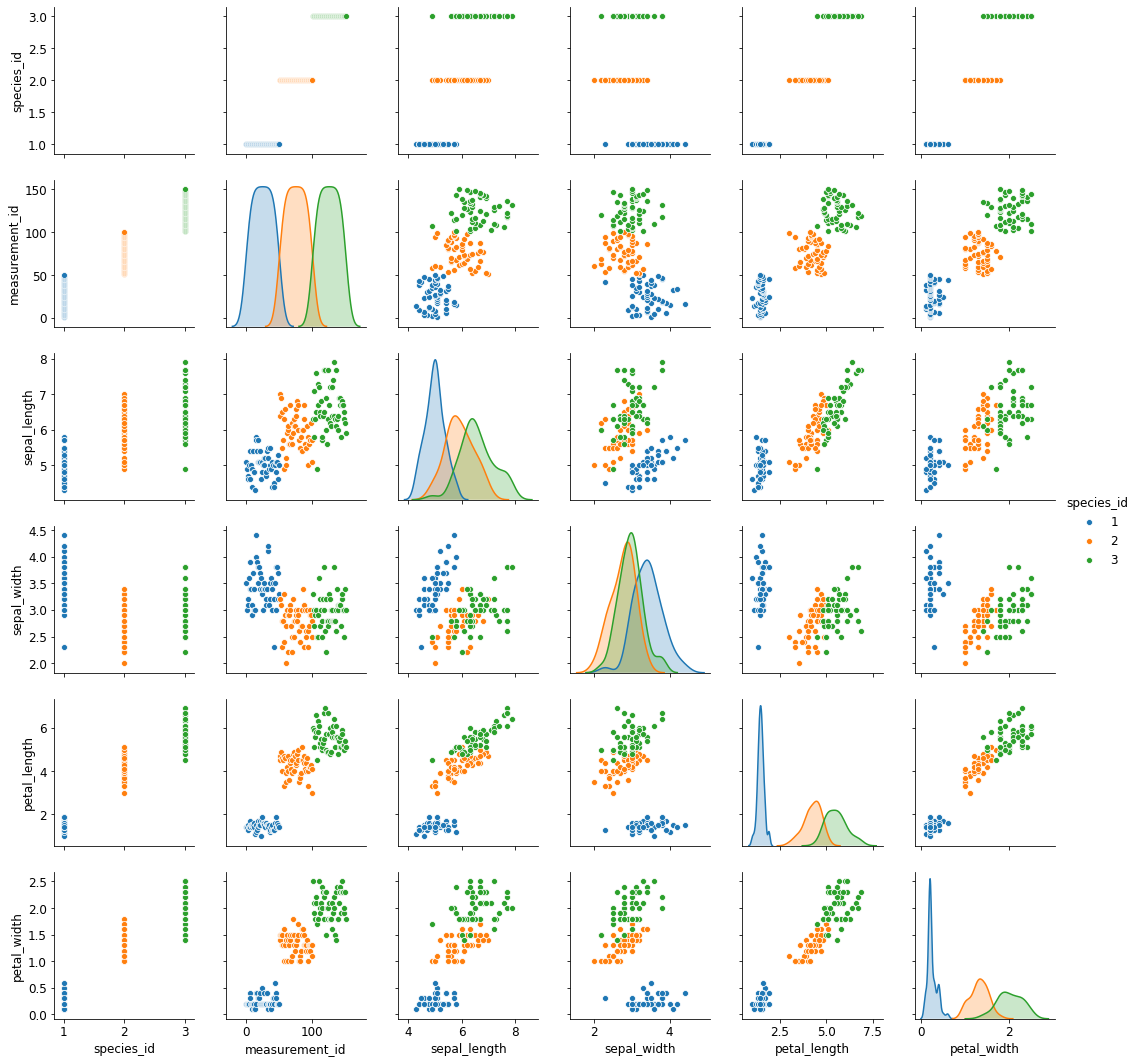

In [11]:
sns.pairplot(plants, hue='species_id')

In [12]:
anscombe = sns.load_dataset('anscombe')

In [13]:
anscombe.groupby(by='dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

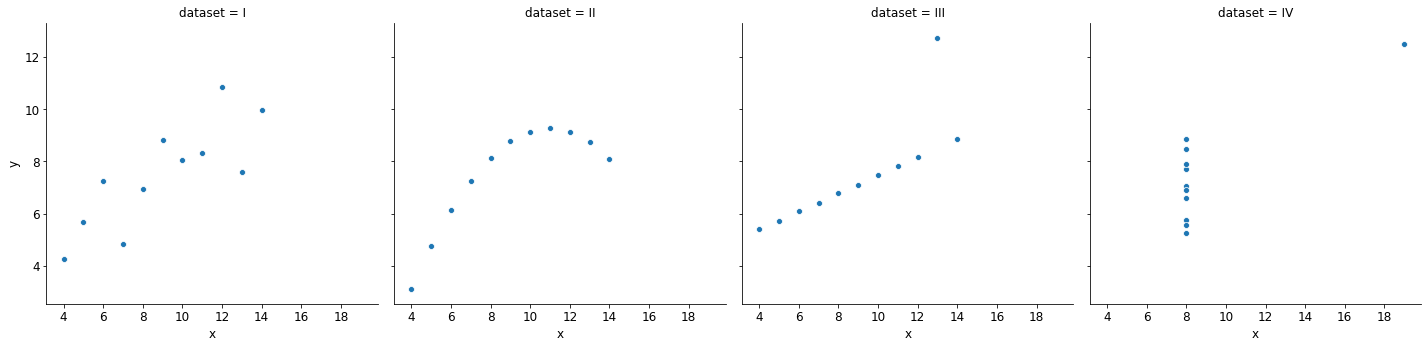

In [14]:
sns.relplot(x='x', y='y', col='dataset', data=anscombe)

In [15]:
insect = data('InsectSprays')#, show_doc=True)

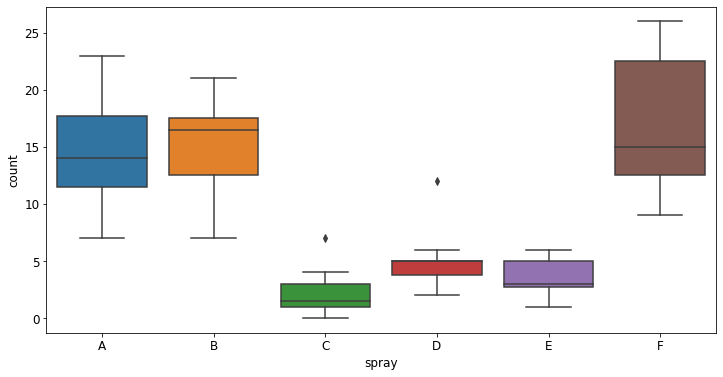

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=insect, x='spray', y='count')

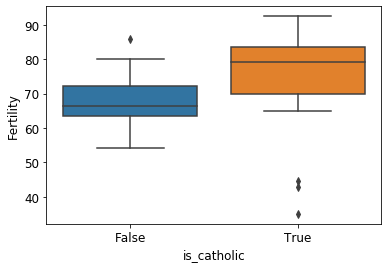

In [17]:
swiss = data('swiss')
swiss['is_catholic'] = swiss.Catholic >= 40
# swiss
sns.boxplot(data=swiss, x='is_catholic', y='Fertility')

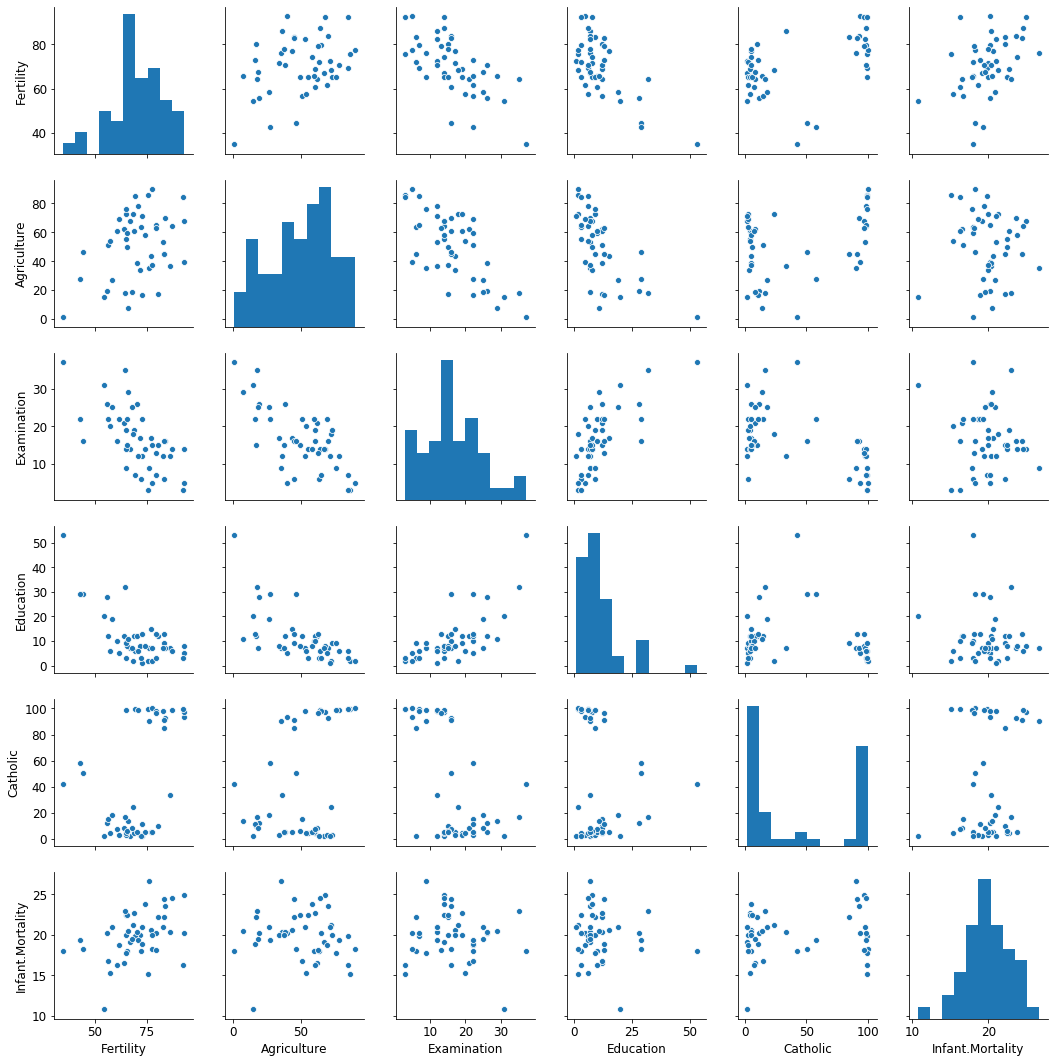

In [18]:
orig_swiss = swiss.drop(columns='is_catholic')
# swiss
sns.pairplot(orig_swiss)

In [19]:
def get_db_url(u,p,h,d):
    url = f'mysql+pymysql://{u}:{p}@{h}/{d}'
    return url

url = get_db_url(user, password, host, 'chipotle')
chipotle = pd.read_sql('SELECT * FROM orders', url)


In [20]:
chipotle.item_price = chipotle.item_price.str.replace('$','').astype(float)


In [21]:
top_4 = (chipotle.groupby('item_name').sum()
         .sort_values(by='quantity',ascending=False).head(4))
top_4 = top_4.reset_index()
top_4

,item_name,id,order_id,quantity,item_price
0,Chicken Bowl,1780635,713926,761,7342.73
1,Chicken Burrito,1238770,497303,591,5575.82
2,Chips and Guacamole,1122252,449959,506,2201.04
3,Steak Burrito,818163,328437,386,3851.43


In [22]:
top_4_list = list(top_4.index)

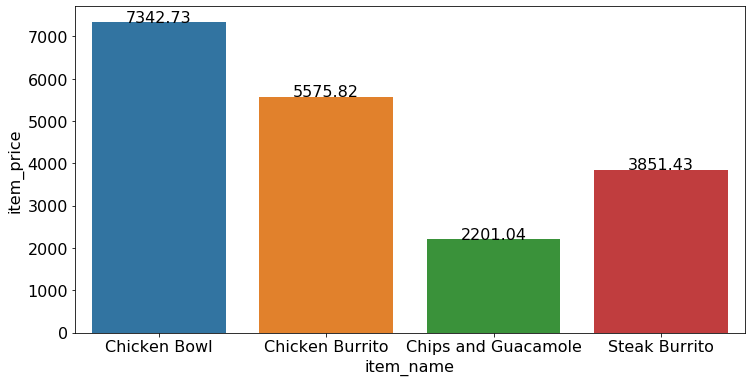

In [23]:
plt.rc('font',size=16)
plt.figure(figsize=(12,6))
chipot_bar = sns.barplot(data=top_4, x='item_name', y='item_price')
for index, row in top_4.iterrows():
    chipot_bar.text(row.name, row.item_price, 
                      round(row.item_price,2), color='black', 
                      ha="center")


In [24]:
sleep = data('sleepstudy')
len(sleep.Subject.unique())
sleep.groupby(['Subject','Days']).mean().reset_index()
sleep.Subject = 'S' + sleep.Subject.astype(str)
sleep_ave = sleep.groupby('Days').mean().reset_index()
sleep_ave

,Days,Reaction
0,0,256.651806
1,1,264.495756
2,2,265.361900
3,3,282.992011
4,4,288.649422
5,5,308.518456
6,6,312.178256
7,7,318.750583
8,8,336.629506
9,9,350.851222


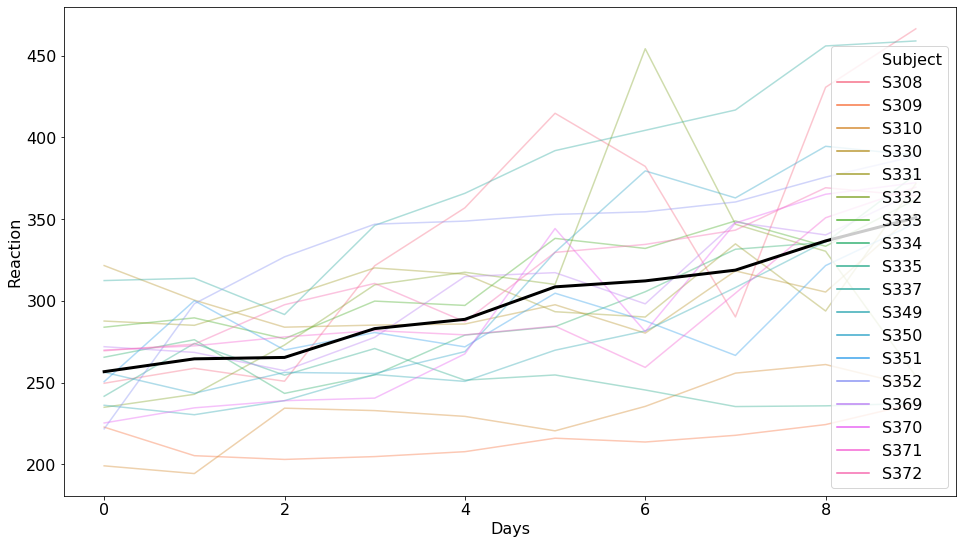

In [25]:
plt.figure(figsize=(16,9))
sns.lineplot(data=sleep, hue='Subject',
              y='Reaction', x='Days', alpha=0.4)
sns.lineplot(data=sleep_ave, x='Days',
             y='Reaction', color='black', linewidth=3) #estimator='mean'